In [ ]:
%pip install requests[security]
%pip install certifi


api_key = "118322912aa8543272e4c9f2401f3a084cf4b1c7f0ff0b2809955ed44a96050a"

print(api_key)

118322912aa8543272e4c9f2401f3a084cf4b1c7f0ff0b2809955ed44a96050a


In [ ]:
# Listing all texts
# curl -H "X-API-KEY: 118322912aa8543272e4c9f2401f3a084cf4b1c7f0ff0b2809955ed44a96050a" https://intelligentarchive.sydney.edu.au/api/v1/texts

import requests
import json
import ssl
import sys

# API URL
url = "https://intelligentarchive.sydney.edu.au/api/v1/texts"

# Headers
headers = {"X-API-KEY": api_key}

# # Perform the API request
try:
    response = requests.get(url, headers=headers)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


# # Output the result
if response.status_code == 200:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")

In [ ]:
# Viewing a single text by ID

text_id = "1037"
url = f"https://intelligentarchive.sydney.edu.au/api/v1/texts/{text_id}"
response = requests.get(url, headers=headers)
if response.status_code == 200:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")

{
    "id": 1037,
    "title": "1HenryIV_1598",
    "author": "Shakespeare",
    "content": "<?xml version=\"1.0\" encoding=\"UTF-8\"?>\r\n<!DOCTYPE TEI.2 SYSTEM \"teilite.dtd\">\r\n<TEI.2>\r\n   <teiHeader>\r\n      <fileDesc>\r\n         <titleStmt>\r\n            <title>Shakespeare, William: \r\n               THE HISTORY OF HENRIE THE FOVRTH; With the battell at Shrewsburie, betweene the King and Lord Henry Percy, \r\n               surnamed Henrie Hotspur of the North, With the humorous conceits of Sir Iohn Falstalffe.</title>\r\n            <respStmt>\r\n               <resp>compiled by</resp>\r\n               <name>Kyonnah Price with homographing and regularising completed by Alexis Antonia</name>\r\n               \r\n            </respStmt>\r\n         </titleStmt>\r\n         <editionStmt>\r\n            <edition/>\r\n         </editionStmt>\r\n         <publicationStmt>\r\n            <publisher>Printed by P.S. for Andrew Wise, dwelling in Paules Churchyard, at the signe of

In [ ]:
 #Creating a new text

new_text_object = {
    "property1": "value1",
    "property2": "value2",
    # ...
}

url = "https://intelligentarchive.sydney.edu.au/api/v1/texts"
response = requests.post(url, headers=headers, json=new_text_object)
if response.status_code == 200:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")

Failed: 400 Bad Request


In [ ]:
# List All Text Sets
url = "https://intelligentarchive.sydney.edu.au/api/v1/text-sets"
response = requests.get(url, headers={"X-API-KEY": api_key})
if response.status_code == 200:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")

In [ ]:
# View A Specific Text Set
textset_id = "86"
url = f"https://intelligentarchive.sydney.edu.au/api/v1/text-sets/{textset_id }"
response = requests.get(url, headers={"X-API-KEY": api_key})
if response.status_code == 200:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")

In [ ]:
#  Create A New Text Set
url = "https://intelligentarchive.sydney.edu.au/api/v1/text-sets"
response = requests.post(url, headers={"X-API-KEY": api_key}, json=new_text_set_data)
if response.status_code == 201:
    print(json.dumps(response.json(), indent=4))
else:
    print(f"Failed: {response.status_code} {response.reason}")


KeyError: ignored

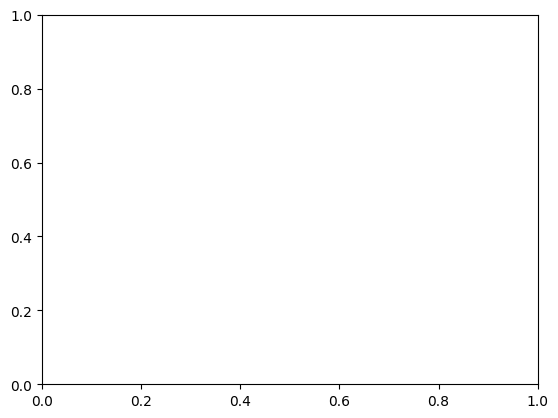

In [ ]:
# Text ID for Concordance
import matplotlib.pyplot as plt

url = "https://intelligentarchive.sydney.edu.au/api/v1/concordance"

text_id = 1038

words_to_search = ["have"]

concordance_request = {
    "text": text_id,
    "option": {
        "words": words_to_search,
        "numOfWordsBefore": 5,  # Optional, default is 5
        "numOfWordsAfter": 5    # Optional, default is 5
    }
}

if response.status_code == 200:
    response_data = response.json()

    def plot_kwic(data):
        fig, ax = plt.subplots()

        y_ticks = []
        y_tick_labels = []

        for i, entry in enumerate(data['words']):
            word = entry['word']
            pre_context = " ".join(entry['preContext'])
            post_context = " ".join(entry['postContext'])

            full_context = f"{pre_context} | {word} | {post_context}"

            y_ticks.append(i)
            y_tick_labels.append(full_context)

            plt.text(0, i, full_context, verticalalignment='bottom', horizontalalignment='left')

        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_tick_labels)
        ax.set_xticks([])
        plt.gca().invert_yaxis()
        plt.show()

    plot_kwic(response_data)

else:
    print(f"Failed: {response.status_code} {response.reason}")

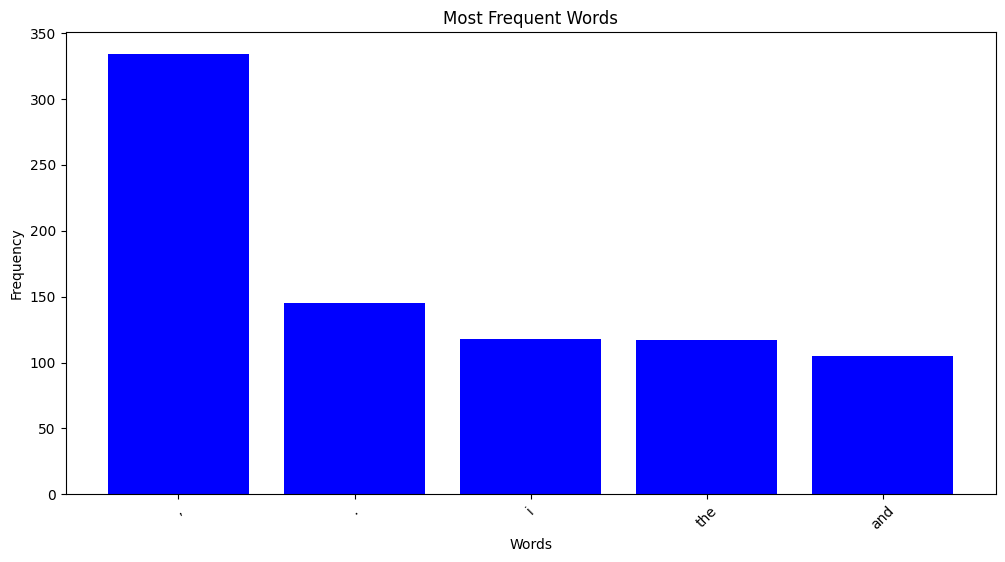

In [ ]:
# Text ID for Word frequency
import matplotlib.pyplot as plt

text_id = 1037  # Replace with your actual text ID

# URL and Data for Word Frequencies
url = "https://intelligentarchive.sydney.edu.au/api/v1/word-frequencies"
word_freq_request = {
    "text": text_id,
}

# Make the API Request
response = requests.post(url, json=word_freq_request, headers={"X-API-KEY": api_key})

# Prepare data for plotting
words = []
frequencies = []

# Handle the Response
if response.status_code == 200:
    response_data = response.json()
    blocks = response_data.get("blocks", [])

    for block in blocks:
        freqs = block.get('frequencies', [])

        for freq in freqs:
            word = freq.get('word', 'N/A')
            value = freq.get('value', 'N/A')

            words.append(word)
            frequencies.append(value)

    # Sort by frequency and take top 20 words
    sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)[:20]
    sorted_words = [words[i] for i in sorted_indices]
    sorted_frequencies = [frequencies[i] for i in sorted_indices]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_words, sorted_frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Most Frequent Words')
    plt.xticks(rotation=45)
    plt.show()

else:
    print(f"Failed: {response.status_code} {response.reason}")

In [ ]:
API_URL = "https://intelligentarchive.sydney.edu.au/api/v1"


# Set the reference and comparison text set IDs
reference_text_set_id = 86
comparison_text_set_id = 86

# Set additional options for word frequencies and divergence calculation
word_frequencies_option = {"$ref": "/api/v1/schemas/wfoption.schema.json"}  # Fill in with any options that apply
divergence_option = {
    "logBase": "e",
    "perWordCalculation": False,
    "logNMCalculation": False,
    "logNMMode": 0,
    "useMostFrequentWords": False,
    "mostFrequentWordSize": 100
}

# Construct the JSON request body
divergence_request = {
    "referenceTextSet": reference_text_set_id,
    "comparisonTextSet": comparison_text_set_id,
    "wordFrequenciesOption": word_frequencies_option,
    "divergenceOption": divergence_option
}

# Send the POST request
response = requests.post(f"{API_URL}/divergence", headers={"X-API-KEY": api_key}, json=divergence_request)

# Handle the response
if response.status_code == 200:
    # Parse the JSON response
    divergence_data = response.json()

    # Now divergence_data will contain all the divergence details from the API response
    # You can process it according to your requirements
    print(json.dumps(divergence_data, indent=4))
else:
    print(f"Failed to get divergence data. Status code: {response.status_code}")
    print(response.text)
